In [3]:
import numpy as np
execfile('midi_to_state.py')
daft_state = midiToNoteStateMatrix('daft_punk-one_more_time.mid')

print "Number of discretized 16th notes: " + str(len(daft_state))

# Number of distinct note types - notes classes
# Although more than one note may be used
num_classes = len(daft_state[0])
print "Number of possible notes: " + str(num_classes)

print "Number of note features: " + str(len(daft_state[0][0]))
print "Number of unique chords: " + str(np.unique(daft_state))

Number of discretized 16th notes: 2401
Number of possible notes: 78
Number of note features: 2
Number of unique chords: [0 1]


In [2]:
## FIXME: Using only notes, not sure yet how to handle if note is pressed
daft_state_simplified = []
for expanded_note in daft_state:
    just_notes = [note_class[0] for note_class in expanded_note]
    daft_state_simplified.append(just_notes)
daft_state_simplified[100][0:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

In [11]:
execfile('two_rnn_midi.py')
max_iters = 1000
results = train(daft_state_simplified[0:100], num_classes, max_iters, 25, False, True)

here


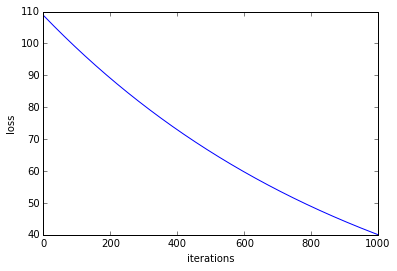

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(results['losses'])
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()